# Implementación de Word2Vec (Softmax)


En primer lugar, definimos las funciones necesarias: para stemming y para indexar el vocabulario.





In [31]:
#-*- encoding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
from nltk.stem.snowball import SnowballStemmer
from itertools import chain
from re import sub
from sklearn.decomposition import PCA
from operator import itemgetter
from nltk.corpus import cess_esp
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from re import compile, sub

#Declaramos el stemeer
stemizer = SnowballStemmer('spanish')

#Funcion para stemming
def stems(string):
  stem_string = []
  for w in string:
    stem_string.append(stemizer.stem(w))
  return stem_string

#Funcion que crea un vocabulario de palabras con un indice numerico
def vocab():
    vocab = defaultdict()
    vocab.default_factory = lambda: len(vocab)
    return vocab    

#Funcion que pasa la cadena de simbolos a una secuencia con indices numericos
def text2numba(corpus, vocab):
    for doc in corpus:
        yield [vocab[w] for w in doc] #.split()]
  

Abrimos el corpus que bamos a utilizar y obtenemos los contextos.

In [32]:
#corpus = ['el perro come un hueso', 'un muchacho jugaba', 'el muchacho saltaba la cuerda',
#          'un perro come croquetas', 'un muchacho juega']

corpus = sent_tokenize(open('borges_aleph.txt','r', encoding='utf8').read().strip())
print(corpus[0])

La candente mañana de febrero en que Beatriz Viterbo murió, después de una imperiosa agonía que no se rebajó un solo instante ni al sentimentalismo ni al miedo, noté que las carteleras de fierro de la Plaza Constitución habían renovado no sé qué aviso de cigarrillos rubios; el hecho me dolió, pues comprendí que el incesante y vasto universo ya se apartaba de ella y que ese cambio era el primero de una serie infinita.


Posteriormente, limpiamos y stemizamos el corpus. Asimismo, creamos el vocabulario con índices numéricos y transformamos las cadenas de palabras encadenas de índices numéricos. Se crean venanas de $1\times 1$

In [33]:
#Abrimos el documento, lo limpiamos y separamos las cadenas
#corpus = sub(r'[^\w\s]','',uploaded['corpus.es'].decode('utf8').strip().lower()).split('\n')
regex = compile('[^a-zA-Z| |ñáéíóú]')
#Stemizamos el documento
#corpus = [sent.split() for sent in corpus] #[stems(sent) for sent in corpus]
corpus = [stems(word_tokenize(regex.sub('', sent).lower())) for sent in corpus]

#Llamamos la funcion para crear el vocabulario
idx = vocab()
#Creamos el vocabulario y le asignamos un indice a cada simbolo segun su aparicion
cads_idx = list(text2numba(corpus,idx))

print(corpus[0])
print(cads_idx[0])

['la', 'candent', 'mañan', 'de', 'febrer', 'en', 'que', 'beatriz', 'viterb', 'mur', 'despues', 'de', 'una', 'imperi', 'agon', 'que', 'no', 'se', 'rebaj', 'un', 'sol', 'instant', 'ni', 'al', 'sentimental', 'ni', 'al', 'mied', 'not', 'que', 'las', 'carteler', 'de', 'fierr', 'de', 'la', 'plaz', 'constitu', 'hab', 'renov', 'no', 'se', 'que', 'avis', 'de', 'cigarrill', 'rubi', 'el', 'hech', 'me', 'dol', 'pues', 'comprend', 'que', 'el', 'inces', 'y', 'vast', 'univers', 'ya', 'se', 'apart', 'de', 'ella', 'y', 'que', 'ese', 'cambi', 'era', 'el', 'primer', 'de', 'una', 'seri', 'infinit']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 11, 12, 13, 6, 14, 15, 16, 17, 18, 19, 20, 21, 22, 20, 21, 23, 24, 6, 25, 26, 3, 27, 3, 0, 28, 29, 30, 31, 14, 15, 6, 32, 3, 33, 34, 35, 36, 37, 38, 39, 40, 6, 35, 41, 42, 43, 44, 45, 15, 46, 3, 47, 42, 6, 48, 49, 50, 35, 51, 3, 11, 52, 53]


In [4]:
cadenas = cads_idx 

#Se obtiene la longitud del alfabeto
N = len(idx)

print(cadenas[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 11, 12, 13, 6, 14, 15, 16, 17, 18, 19, 20, 21, 22, 20, 21, 23, 24, 6, 25, 26, 3, 27, 3, 0, 28, 29, 30, 31, 14, 15, 6, 32, 3, 33, 34, 35, 36, 37, 38, 39, 40, 6, 35, 41, 42, 43, 44, 45, 15, 46, 3, 47, 42, 6, 48, 49, 50, 35, 51, 3, 11, 52, 53]


Hecho esto, extraemos los bigramas del texto.

In [5]:
#Se crean los bigramas
contexts = list(chain(*[zip(cad,cad[1:]) for cad in cadenas])) + list(chain(*[zip(cad[1:],cad) for cad in cadenas]))

#Se obtiene la frecuencia de cada bigrama
frecContexts = Counter(contexts)

print(contexts[:100])

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 3), (3, 11), (11, 12), (12, 13), (13, 6), (6, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 20), (20, 21), (21, 23), (23, 24), (24, 6), (6, 25), (25, 26), (26, 3), (3, 27), (27, 3), (3, 0), (0, 28), (28, 29), (29, 30), (30, 31), (31, 14), (14, 15), (15, 6), (6, 32), (32, 3), (3, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 6), (6, 35), (35, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 15), (15, 46), (46, 3), (3, 47), (47, 42), (42, 6), (6, 48), (48, 49), (49, 50), (50, 35), (35, 51), (51, 3), (3, 11), (11, 52), (52, 53), (49, 35), (35, 44), (44, 54), (54, 55), (55, 14), (14, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 15), (15, 63), (63, 64), (64, 65), (65, 0), (0, 30), (30, 66), (66, 67), (67, 55), (55, 68), (68, 69), (69, 70), (70, 71), (71, 72)]


Ahora, paamos a la rd neuronla.
Primero, inicializamos los parámetros de la red. Requerimos de dos matrices U (la matriz de embedding) y W (la matriz de la capa de salida).

In [6]:
np.random.seed(0)
#El número de rasgos que representan cada vector
nn_input_dim = N
#El total de clases que arrojará
output_dim = N
#El número de ejmplos
num_examples = len(contexts)

#Dimensiones de los vectores-palabra
dim = 2

#Embedding
C = np.random.randn(dim, N) / np.sqrt(N)

#Capa de salida
W = np.random.randn(N,dim) / np.sqrt(dim)

print(C.shape)
print(W.shape)

(2, 1524)
(1524, 2)


Ahora entrenamos la red con el algoritmo de backpropagation y de gradiente descendiente.

In [7]:
%%time
#Guarda el riesgo por época
R = []

#Hiperparámetros
its = 100
eta = 0.1
for i in range(0,its):
    #Acumula el riesgo de los 
    #ejemplos en la época actual
    R_x = 0
    for ex in contexts:
        #Forward
        #Embedimiento
        u_w = C.T[ex[0]]
        #salida
        a = np.dot(W,u_w)
        out = np.exp(a) # - np.max(a))
        #Softmax
        f = out/out.sum(0)
        #Suma riesgo por ejemplo
        R_x += -np.log(f)[ex[1]]

        #Backprop
        #Variable de salida
        d_out = f
        d_out[ex[1]] -= 1
        
        #Variable de embedding
        d_emb = np.dot(d_out,W)
        
        #Actualizacion de salida
        W -= eta*np.outer(d_out,u_w)

        #Actualizacion de embedding
        C.T[ex[0]] -= eta*d_emb
    
    #Guarda el riesgo en la época
    R.append(R_x)
    #Imprime información de época
    print('Fin de la iteración {}. Riesgo: {}'.format(i, R_x))

Fin de la iteración 0. Riesgo: 62381.43560463933
Fin de la iteración 1. Riesgo: 57249.781347191805
Fin de la iteración 2. Riesgo: 53047.141059796355
Fin de la iteración 3. Riesgo: 51374.9493898501
Fin de la iteración 4. Riesgo: 50607.57749381352
Fin de la iteración 5. Riesgo: 50132.26891223573
Fin de la iteración 6. Riesgo: 49791.11830223971
Fin de la iteración 7. Riesgo: 49526.6929912567
Fin de la iteración 8. Riesgo: 49313.773906421826
Fin de la iteración 9. Riesgo: 49138.70523447623
Fin de la iteración 10. Riesgo: 48992.95779203332
Fin de la iteración 11. Riesgo: 48870.602307142675
Fin de la iteración 12. Riesgo: 48767.20061005804
Fin de la iteración 13. Riesgo: 48679.342081658906
Fin de la iteración 14. Riesgo: 48604.330886072734
Fin de la iteración 15. Riesgo: 48539.96536081687
Fin de la iteración 16. Riesgo: 48484.455329277014
Fin de la iteración 17. Riesgo: 48436.38487175208
Fin de la iteración 18. Riesgo: 48394.63049358595
Fin de la iteración 19. Riesgo: 48358.25661567158
Fin d

Podemos visualizar como se minimiza la función de riesgo a través de las iteraciones.

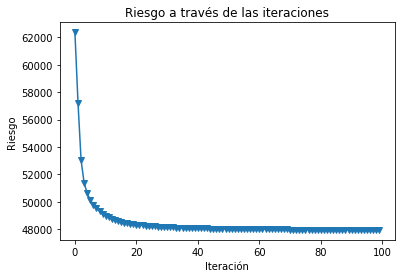

In [8]:
#Ploteo del riesgo
plt.plot(R, 'v-')
plt.title('Riesgo a través de las iteraciones')
plt.xlabel('Iteración')
plt.ylabel('Riesgo')
plt.show()

### Aplicación de la red

Entrenada la red, definimos una función forward para obtener las probabilidades a partir de la red ya entrenada.

In [9]:
#Forward
def forward(x):    
    #Embedimiento
    u_w = C.T[x]
    #Capa de salida
    out = np.exp(np.dot(W,u_w))
    p = out/out.sum(0)
    return p

Podemos probar cómo son las probabilidades de la red. En este caso, lo hacemos para el símbolo BOS.

In [28]:
#for word in idx.keys():
probs = sorted(list(zip(idx.keys(),forward(idx['infinit']))), key=itemgetter(1), reverse=True)
probs[:20]

[('de', 0.038176918142471886),
 ('en', 0.017909391041895956),
 ('a', 0.014557162648726535),
 ('y', 0.014334084561012865),
 ('que', 0.011315246430016352),
 ('vi', 0.007330155355420444),
 ('tod', 0.006928234128033684),
 ('aleph', 0.006317570202325492),
 ('par', 0.006088867848752325),
 ('es', 0.005744297763202286),
 ('por', 0.0057261053981883915),
 ('era', 0.004747870099240432),
 ('del', 0.004549816290149445),
 ('con', 0.004353379088178406),
 ('argentin', 0.004123669943301754),
 ('espej', 0.004077811849812892),
 ('per', 0.003991795942585374),
 ('sol', 0.0038395116084809127),
 ('o', 0.0035962397547391212),
 ('se', 0.0035133773986019854)]

## Vectores distribuidos

Los vectores de word embeddings se almacenan en la matriz de la capa de embedding (capa oculta). De esta forma, cada columna de la matriz corresponde a un vector que representa una palabra.

In [11]:
pd.DataFrame(data=C.T, index=list(idx.keys()))

,0,1
la,0.071946,1.571248
candent,2.120305,-0.557875
mañan,-2.338513,2.880450
de,0.013222,0.371907
febrer,1.694601,3.931954
...,...,...
ment,0.957419,1.031564
poros,1.093793,1.628693
tragic,3.008104,-1.405820
erosion,-0.072291,1.547840


Podemos, entonces, visualizar los datos en un espacio vectorial.

In [12]:
#Función para visualizar palabras
def plot_words(Z,ids):
    Z = PCA(2).fit_transform(Z)
    r=0
    plt.scatter(Z[:,0],Z[:,1], marker='o', c='blue')
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        plt.annotate(label, xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1

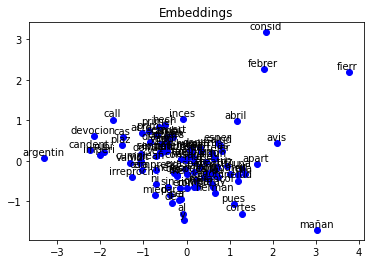

In [36]:
#Visualización de los embeddings
plot_words(C.T[:100], list(idx.keys())[:100])
plt.title('Embeddings')
plt.show()

## Implementación con Pytorch

La paquetería de Pytorch permite implementar modelos basados en redes neuronales. Por tanto, podemos implementar una red para obtener embeddings como en el algoritmo de Word2Vec.

In [14]:
import torch
import torch.nn as nn

Definimos la red. En este caso, Pytorch ya cuenta con capas de embeddings, por lo que únicamente bastará señalar que queremos una capa de tipo Embedding.

In [15]:
network = nn.Sequential(nn.Embedding(N, 2),nn.Linear(2, N, bias=False), nn.Softmax(dim=1))

Definimos la función de riesgo y el optimizador:

In [16]:
risk = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=0.1)

Procedemos a entrenar la red con los datos:

In [17]:
%%time
R2 = []
for i in range(0,its):
    R_it = 0
    for ex in contexts:
        optimizer.zero_grad()
        probs = network(torch.tensor([ex[0]]))
        loss = risk(probs, torch.LongTensor([ex[1]]))
        loss.backward()
        optimizer.step()
        R_it += loss.detach()
        
    #Guarda el riesgo en la época
    R2.append(R_it)
    #Imprime información de época
    print('Fin de la iteración {}. Riesgo: {}'.format(i, R_it))

Fin de la iteración 0. Riesgo: 63715.2265625
Fin de la iteración 1. Riesgo: 63715.22265625
Fin de la iteración 2. Riesgo: 63715.22265625
Fin de la iteración 3. Riesgo: 63715.21875
Fin de la iteración 4. Riesgo: 63715.2109375
Fin de la iteración 5. Riesgo: 63715.2109375
Fin de la iteración 6. Riesgo: 63715.203125
Fin de la iteración 7. Riesgo: 63715.1875
Fin de la iteración 8. Riesgo: 63715.18359375
Fin de la iteración 9. Riesgo: 63715.18359375
Fin de la iteración 10. Riesgo: 63715.18359375
Fin de la iteración 11. Riesgo: 63715.1796875
Fin de la iteración 12. Riesgo: 63715.1640625
Fin de la iteración 13. Riesgo: 63715.15234375
Fin de la iteración 14. Riesgo: 63715.1484375
Fin de la iteración 15. Riesgo: 63715.13671875
Fin de la iteración 16. Riesgo: 63715.12109375
Fin de la iteración 17. Riesgo: 63715.11328125
Fin de la iteración 18. Riesgo: 63715.0859375
Fin de la iteración 19. Riesgo: 63715.06640625
Fin de la iteración 20. Riesgo: 63715.03125
Fin de la iteración 21. Riesgo: 63714.9960

Podemos visualizar el riesgo:

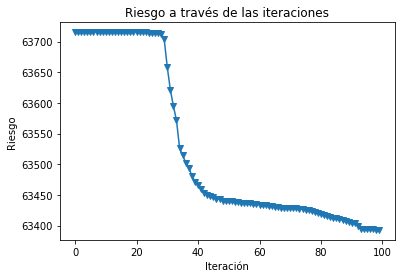

In [18]:
#Ploteo del riesgo
plt.plot(R2, 'v-')
plt.title('Riesgo a través de las iteraciones')
plt.xlabel('Iteración')
plt.ylabel('Riesgo')
plt.show()

Finalmente, observamos el comportamiento de los embeddings:

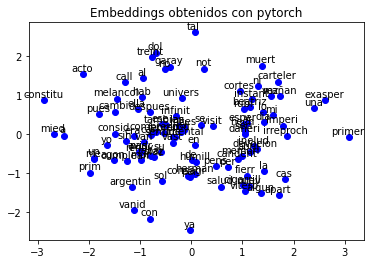

In [19]:
C2 = network[0].weight.detach()
plot_words(C2[:100], list(idx.keys())[:100])
plt.title('Embeddings obtenidos con pytorch')
plt.show()